# 用opencv跑

In [2]:
import numpy as np
import cv2

img = cv2.imread('2.jpg')
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 5
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 用scikit-learn跑

In [1]:
import numpy as np
import cv2

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = len(np.unique(clt.labels_))
    (hist, _) = np.histogram(clt.cluster_centers_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        print color
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

[ 41.89998038  37.38426821  37.35783366]
[ 177.47255921  178.78095095  187.75440183]
[ 133.78577102   61.15488483   53.25632588]
[  92.23968034  120.74839839  113.72815534]
[ 191.07073558  162.91839831  124.33875463]


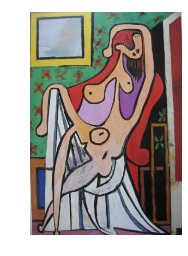

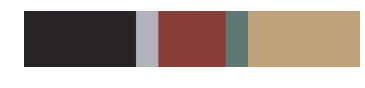

In [2]:
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2


# 因為cv2是BGR，為了讓matplotlib顯示正常
# 把它改成RGB

#'''檔名'''
image = cv2.imread('010.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

# 重新改變image的型態
image = image.reshape((image.shape[0] * image.shape[1], 3))


#'''設立k群'''
k = 5

clt = KMeans(n_clusters = k)
clt.fit(image)

# 讀取建立後上面建立的主顏色值和比例
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

#顯示圖片
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()